<a href="https://colab.research.google.com/github/DanaGuber/MachineLearning/blob/main/clase2-problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
metrics.accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [206]:
def predicciones(n,m,dn,dm,umb):
  #Defino media y desvio estandar de ambos grupos de datos
  media_naranjas = n
  media_mandarinas = m

  desv_naranjas = dn
  desv_mandarinas = dm

  #genero datos random que en su conjunto tengan de media y desvio estandar los definidos anteriormente
  np.random.seed(1)
  A = np.random.normal(loc=media_naranjas,scale=desv_naranjas, size= 100)
  B = np.random.normal(loc=media_mandarinas,scale=desv_mandarinas, size= 100)

  #Transformo ese conjunto de valores en un dataframe (Lista a dataframe)
  df1 = pd.DataFrame({'etiqueta':'naranjas','valor':A})
  df2 = pd.DataFrame({'etiqueta':'mandarinas','valor':B})

  #Uno los dataframe para tener un dataframe de ambos. El ignore_index hace que no haga rejunte del conteo de cada dataframe sino uno nuevo de ambos juntos.
  df = pd.concat([df1,df2],ignore_index=True)

  #defino mi umbral
  umbral = umb

  #Defino una función que me devuelve valor 0 si x es menor al umbral, o 1 si es igual o mayor.
  def prediccion(umbral):
    a = pd.Series(0 if x<umbral else 1 for x in df['valor'])
    return a
 

  #Usando la función planteo diferentes umbrales
  df['prediccion_1'] = prediccion(umbral+2)
  df['prediccion_2']= prediccion(umbral+1)
  df['prediccion_3']=prediccion(umbral)
  df['prediccion_4']=prediccion(umbral-1)

  #Transformo en series de naranjas y mandarinas en 0  y 1
  label = pd.Series(1 if x == "naranjas" else 0 for x in df['etiqueta'])

  #valores (0 o 1) predecidos dependiendo si es naranja o mandarina acorde al umbral determinado
  Prediccion_1= df['prediccion_1'].values
  Prediccion_2= df['prediccion_2'].values
  Prediccion_3= df['prediccion_3'].values
  Prediccion_4= df['prediccion_4'].values

  #determino fpr y tpr
  fpr1, tpr1, thresholds1 = metrics.roc_curve(label,Prediccion_1)
  fpr2, tpr2, thresholds2 = metrics.roc_curve(label,Prediccion_2)
  fpr3, tpr3, thresholds3 = metrics.roc_curve(label,Prediccion_3)
  fpr4, tpr4, thresholds4 = metrics.roc_curve(label,Prediccion_4)
  
  #junto los puntos para mi curva roc
  x = [0,fpr1[1],fpr2[1],fpr3[1],fpr4[1],1]
  y = [0,tpr1[1],tpr2[1],tpr3[1],tpr4[1],1]
  
  #grafico la curva roc
  plt.plot(x,y)

  #determino parámetros de calidad:exactitud, precision y f-measure
  parametros_de_calidad=[[accuracy_score(label, Prediccion_1), precision_score(label,Prediccion_1), f1_score(label, Prediccion_1)],
                         [accuracy_score(label, Prediccion_2), precision_score(label,Prediccion_2), f1_score(label, Prediccion_2)],
                         [accuracy_score(label, Prediccion_3), precision_score(label,Prediccion_3), f1_score(label, Prediccion_3)],
                         [accuracy_score(label, Prediccion_4), precision_score(label,Prediccion_4), f1_score(label, Prediccion_4)]]
  
  parametros_de_calidad = pd.DataFrame(parametros_de_calidad, columns = ['exactitud','precision','f-measure'])
  return(parametros_de_calidad)


,exactitud,precision,f-measure
0,0.815,0.956522,0.781065
1,0.860,0.928571,0.847826
2,0.870,0.849057,0.873786
3,0.790,0.719697,0.818966


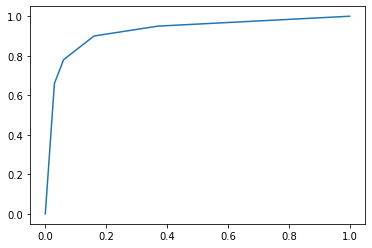

In [207]:
predicciones(20,15,3,2,17)

,exactitud,precision,f-measure
0,0.760,0.981481,0.688312
1,0.815,0.956522,0.781065
2,0.860,0.928571,0.847826
3,0.870,0.849057,0.873786


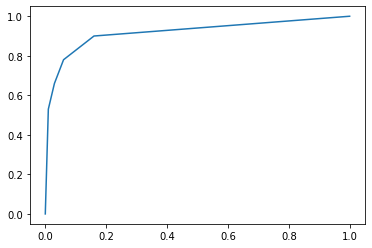

In [208]:
#cambio el umbral, lo acerco al valor medio entre las medias
predicciones(20,15,3,2,18)

,exactitud,precision,f-measure
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0


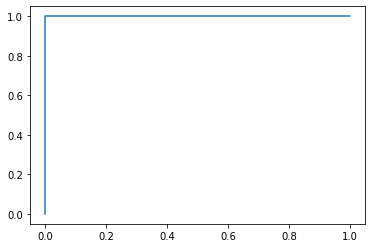

In [209]:
#medias alejadas, no se llegan a cruzar las gaussianas, por eso el resultado de las predicciones es tan bueno
predicciones(30,10,3,1,17)

,exactitud,precision,f-measure
0,0.970,0.970000,0.970000
1,0.920,0.862069,0.925926
2,0.705,0.628931,0.772201
3,0.565,0.534759,0.696864


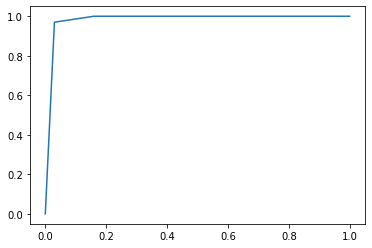

In [210]:
#apenas se tocan las gaussianas
predicciones(18,10,3,1,10) 

,exactitud,precision,f-measure
0,0.675,0.660550,0.688995
1,0.655,0.604027,0.722892
2,0.595,0.554286,0.705455
3,0.550,0.527174,0.683099


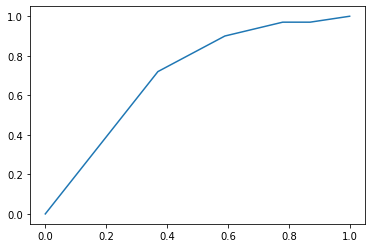

In [211]:
#gaussianas con medias muy cercanas
predicciones(20,18,2,2,17)

,exactitud,precision,f-measure
0,0.625,0.837838,0.452555
1,0.685,0.768116,0.627219
2,0.675,0.660550,0.688995
3,0.655,0.604027,0.722892


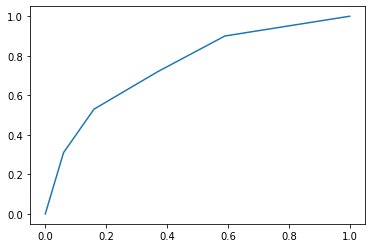

In [212]:
#valor umbral diferente
predicciones(20,18,2,2,19)